In [1]:
import pandas as pd
import pandas_profiling as pp
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
from pandas_profiling import ProfileReport

In [5]:
profile = ProfileReport(salary_data, title="Pandas Profiling Report", explorative=True)

In [6]:
profile

In [9]:
profile.to_file("profile.html")

In [3]:
salary_data = pd.read_csv("C:\\data science\\data sets\\Salary_Data.csv")

In [4]:
salary_data

,YearsExperience,Salary
0,1.1,39343.0
1,1.3,46205.0
2,1.5,37731.0
3,2.0,43525.0
4,2.2,39891.0
5,2.9,56642.0
6,3.0,60150.0
7,3.2,54445.0
8,3.2,64445.0
9,3.7,57189.0


In [10]:
salary_data.head()

,YearsExperience,Salary
0,1.1,39343.0
1,1.3,46205.0
2,1.5,37731.0
3,2.0,43525.0
4,2.2,39891.0


In [12]:
salary_data.corr()

,YearsExperience,Salary
YearsExperience,1.000000,0.978242
Salary,0.978242,1.000000


In [19]:
#convert df into numpy_array style
x=salary_data.iloc[:,[0]].to_numpy().reshape(-1, 1)
y=salary_data.iloc[:,[1]].to_numpy().reshape(-1, 1)

In [24]:
# make linear regression into an instance
lr = LinearRegression()
x_train,x_test,y_train,y_test=train_test_split(x,y, test_size=0.1, random_state=123)
#Fitting
lr.fit(x_train,y_train)

LinearRegression()

In [26]:
y_predict = lr.predict(x_test)
y_predict

array([[ 55853.11598533],
       [125629.83831319],
       [ 52985.57945131]])

In [34]:
lr.predict([[1.1]])   

array([[35780.36024718]])

In [33]:
lr.coef_

array([[9558.4551134]])

In [29]:
#Check this model's performance by using R2 score.
r2s=r2_score(y_test, y_predict)
r2s

0.9899592500319423

In [30]:
print("R2 Score is ","{:,.2f}".format(r2s),".")
print("If the score is close to 1, it's good. If the score is almost 0, the model can't explain the situation by using Linear Regression.")

R2 Score is  0.99 .
If the score is close to 1, it's good. If the score is almost 0, the model can't explain the situation by using Linear Regression.


C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


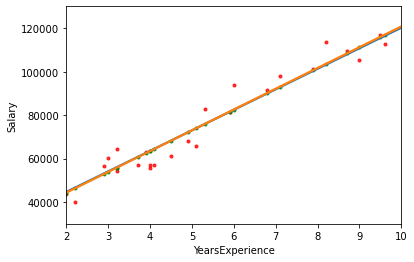

In [54]:
# Actual Line

sns.regplot(salary_data.YearsExperience, salary_data.Salary, order=1, ci=None, scatter_kws={'color':'r', 's':9}) 

#Predicted Line

sns.regplot(salary_data.YearsExperience, results, order=1, ci=None, scatter_kws={'color':'g', 's':9}) 

plt.xlim(2,10)
plt.ylim(bottom=30000)
plt.show() 

In [50]:
list1 = []

for x in salary_data['YearsExperience']:
    print(lr.predict([[x]]))   
    list1.append(lr.predict([[x]]))

[[35780.36024718]]
[[37692.05126986]]
[[39603.74229254]]
[[44382.96984925]]
[[46294.66087193]]
[[52985.57945131]]
[[53941.42496265]]
[[55853.11598533]]
[[55853.11598533]]
[[60632.34354203]]
[[62544.03456472]]
[[63499.88007606]]
[[63499.88007606]]
[[64455.7255874]]
[[68279.10763276]]
[[72102.48967812]]
[[74014.1807008]]
[[75925.87172348]]
[[81660.94479153]]
[[82616.79030287]]
[[90263.55439359]]
[[93131.09092761]]
[[100777.85501833]]
[[103645.39155236]]
[[108424.61910906]]
[[111292.15564308]]
[[116071.38319978]]
[[117027.22871112]]
[[123718.14729051]]
[[125629.83831319]]


In [51]:
from itertools import chain
flatten_list = list(chain.from_iterable(list1))
str(flatten_list)

'[array([35780.36024718]), array([37692.05126986]), array([39603.74229254]), array([44382.96984925]), array([46294.66087193]), array([52985.57945131]), array([53941.42496265]), array([55853.11598533]), array([55853.11598533]), array([60632.34354203]), array([62544.03456472]), array([63499.88007606]), array([63499.88007606]), array([64455.7255874]), array([68279.10763276]), array([72102.48967812]), array([74014.1807008]), array([75925.87172348]), array([81660.94479153]), array([82616.79030287]), array([90263.55439359]), array([93131.09092761]), array([100777.85501833]), array([103645.39155236]), array([108424.61910906]), array([111292.15564308]), array([116071.38319978]), array([117027.22871112]), array([123718.14729051]), array([125629.83831319])]'

In [52]:
results = list(map(float, flatten_list))
results

[35780.36024718186,
 37692.05126986283,
 39603.7422925438,
 44382.969849246234,
 46294.66087192721,
 52985.579451310616,
 53941.4249626511,
 55853.11598533208,
 55853.11598533208,
 60632.34354203451,
 62544.03456471548,
 63499.88007605597,
 63499.88007605597,
 64455.72558739645,
 68279.1076327584,
 72102.48967812036,
 74014.18070080131,
 75925.8717234823,
 81660.94479152522,
 82616.7903028657,
 90263.55439358958,
 93131.09092761105,
 100777.85501833496,
 103645.39155235639,
 108424.61910905884,
 111292.1556430803,
 116071.38319978272,
 117027.2287111232,
 123718.14729050663,
 125629.83831318759]

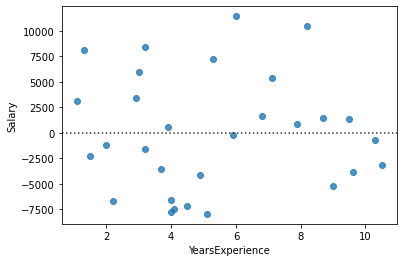

In [44]:
sns.residplot(x = "YearsExperience", y = "Salary", data = salary_data)
plt.show()

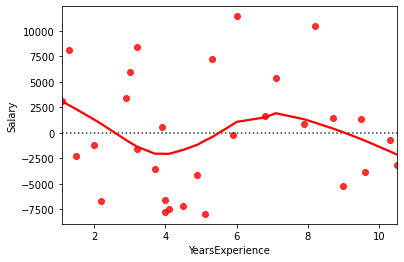

In [47]:
sns.residplot(x = "YearsExperience", y = "Salary", data = salary_data, lowess = True,color = 'r') 
plt.show()

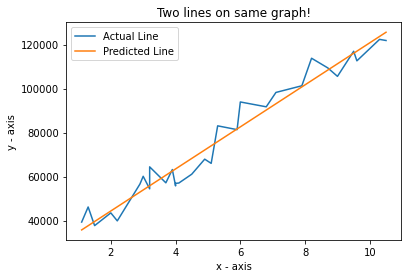

In [53]:
import matplotlib.pyplot as plt

plt.plot(salary_data['YearsExperience'], salary_data['Salary'], label = "Actual Line")

plt.plot(salary_data['YearsExperience'], results, label = "Predicted Line")

plt.xlabel('x - axis')
plt.ylabel('y - axis')
plt.title('Two lines on same graph!')
plt.legend()
plt.show()

In [55]:
from sklearn import metrics

In [58]:
Mean_square_error = metrics.mean_squared_error(y_test, y_predict)

Mean_square_error

9824516.881695418

In [13]:
import statsmodels.formula.api as smf

In [14]:
model = smf.ols("YearsExperience~Salary",data = salary_data).fit()

In [15]:
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:        YearsExperience   R-squared:                       0.957
Model:                            OLS   Adj. R-squared:                  0.955
Method:                 Least Squares   F-statistic:                     622.5
Date:                Mon, 24 May 2021   Prob (F-statistic):           1.14e-20
Time:                        22:42:03   Log-Likelihood:                -26.168
No. Observations:                  30   AIC:                             56.34
Df Residuals:                      28   BIC:                             59.14
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     -2.3832      0.327     -7.281      0.000      -3.054      -1.713
Salary         0.0001   4.06e-06     24.950      0.000     9.3e-05       0.000
==============================================================================
Omnibus:                        3.544   Durbin-Watson:                   1.587
Prob(Omnibus):                  0.170   Jarque-Bera (JB):                2.094
Skew:                          -0.412   Prob(JB):                        0.351
Kurtosis:                       2.003   Cond. No.                     2.41e+05
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.41e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""